In [1]:
import pandas as pd
import os
import numpy as np

processed_data_path = os.path.join(os.path.pardir,'data','processed')
train_file_path = os.path.join(processed_data_path,'train.csv')
test_file_path = os.path.join(processed_data_path,'test.csv')

# read train and test data as dataframes
train_df = pd.read_csv(train_file_path,index_col='PassengerId')
test_df = pd.read_csv(test_file_path,index_col='PassengerId')

# prepare features as matrix of floats and output as array
X = train_df.loc[:,'Age':].as_matrix().astype('float')
y = train_df['Survived'].ravel()

# designate 80% for training and 20% for validation within the training set
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

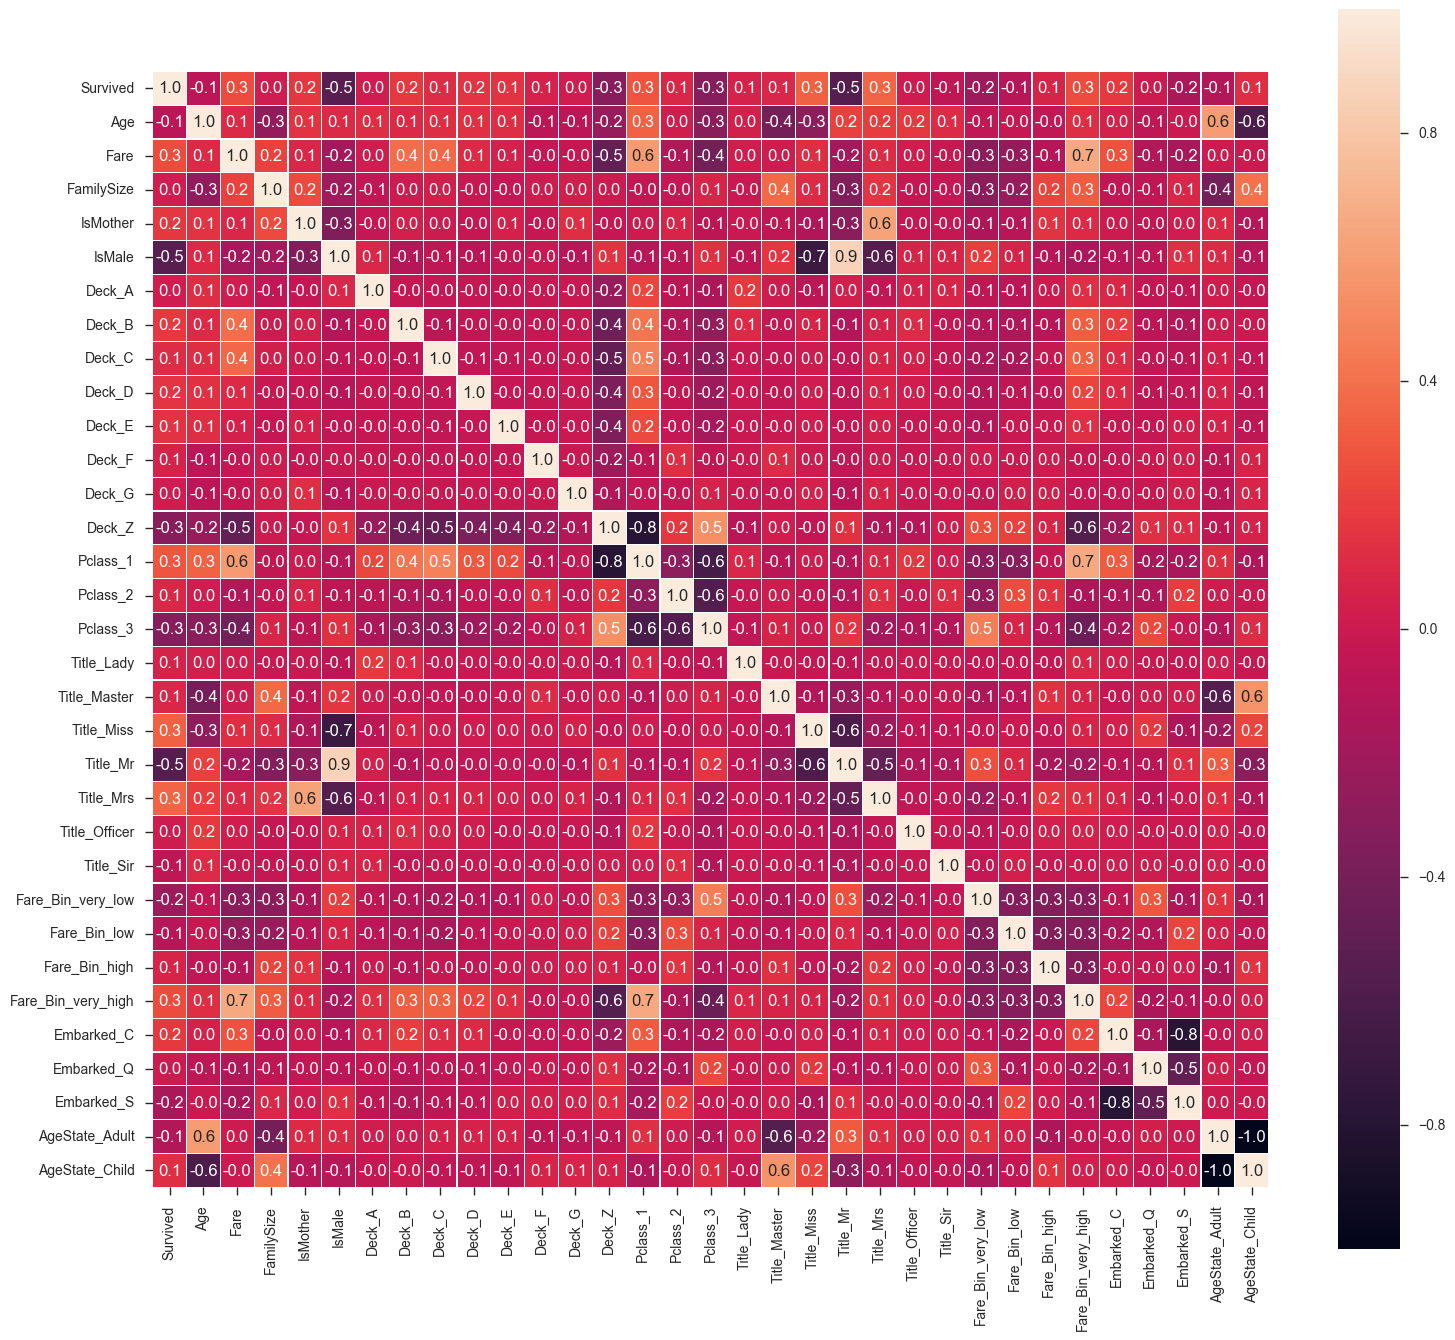

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='ticks', color_codes=True)
plt.figure(figsize=(18, 16))
sns.heatmap(train_df.astype('float').corr(), 
            linewidths=0.1, 
            square=True, 
            linecolor='white', 
            annot=True, fmt='.1f')
plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder
raw_data_path = os.path.join(os.path.pardir,'data','raw')
data_file_path = os.path.join(raw_data_path,'train.csv')
data_df = pd.read_csv(data_file_path,index_col='PassengerId')

for label in ['Embarked']:
    data_df[label] = LabelEncoder().fit_transform(data_df[label])
    
data_df[1:5]

TypeError: unorderable types: str() > float()

In [12]:
from sklearn import svm
# Create SVM classification object 
model = svm.SVC(kernel='linear', C=1, gamma=1) 
# there is various option associated with it, like changing kernel, gamma and C value
model.fit(X_train, y_train)
model.score(X_train, y_train)
#Predict Output
predictions = model.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)a
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 0.17


In [3]:
# Hyperparam opt
#from sklearn.model_selection import GridSearchCV
#parameters = {'C':[0.001,0.01,0.1,10,100,1000]}
#g_search_clf = GridSearchCV(model,param_grid=parameters,cv=3)
#g_search_clf.fit(X_train,y_train)
# evaluate model
#print('score for SVM: {0:.2f}'.format(g_search_clf.score(X_test,y_test)))

score for SVM: 0.82


In [13]:
def get_submission_file(model,filename):
    # convert to matrix
    test_X = test_df.as_matrix().astype('float')
    # make predictions
    predictions = model.predict(test_X)
    # submission dataframe
    df_submission = pd.DataFrame({'PassengerId': test_df.index,'Survived': predictions})
    # submission file
    submission_data_path = os.path.join(os.path.pardir,'data','external')
    submission_file_path = os.path.join(submission_data_path,filename)
    # write to file
    df_submission.to_csv(submission_file_path,index=False)

get_submission_file(model,'svm.csv')

In [14]:
!head ../data/external/svm.csv

PassengerId,Survived
892,0
893,1
894,0
895,0
896,1
897,0
898,1
899,0
900,1
